# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [3]:
# Libraries
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [9]:
# your code here
mu = 50
sigma = 5
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

C:\Users\bruna\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[NormaltestResult(statistic=0.4976170824582443, pvalue=0.7797292450974389),
 NormaltestResult(statistic=0.4456078076654551, pvalue=0.8002717641345751),
 NormaltestResult(statistic=1.5287948783133782, pvalue=0.46561440747377414),
 NormaltestResult(statistic=0.46066050713672957, pvalue=0.7942712482700169)]

```Answer:```

    This function tests the null hypothesis that a sample comes from a normal distribution 
    assuming that all observations in each sample are independent and identically distributed. 
    
    It first computes the skewness and kurtosis to quantify how far from normal the distribution 
    is in terms of asymmetry and shape. So the higher the statistic, the more different to a normal 
    distribution. 

    It then calculates how far each of these values differs from the value expected with a 
    Gaussian distribution, and computes a single p-value from the sum of these discrepancies. 

    If the p-value is lower than the significance level, the null hypothesis can be rejected. 
    If the p-value is greater than the significance level, we can't neither reject the null hypothesis nor accept it.

$H_0$: A sample comes from a normal distribution.<br/>
$H_a$: A sample does not comes from a normal distribution.

    If the p-value is less than 0.05, we can reject the null hypothesis that a sample comes from a normal distribution with a confidence level of 95%. 

    For the distributions generated, all of them pass the normal test.

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

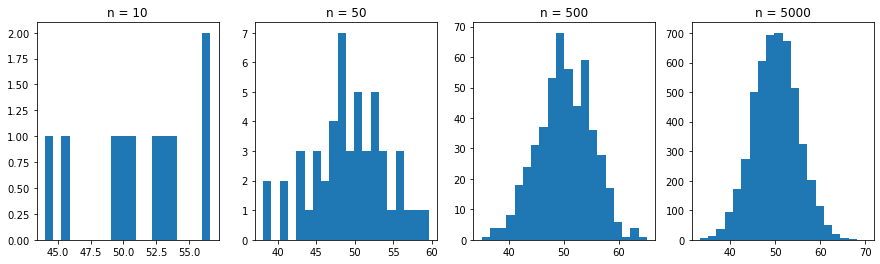

In [11]:
f, ax = plt.subplots(1,4)
f.set_figwidth(15)

# Variables
bins = 20

# Plot each histogram
for x in range(4):
    ax[x].set_title('n = ' + str(sample_size[x]))
    ax[x].hist(dists[x], bins)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Answer:`

    As the sample size increases, we see that the distritubtion more closely approximates a normal distribution 
    around the mean, as is stated by the CLT.

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [15]:
# your code here
# Variables 
n = 5
p = 0.15
x = range(n)

# Binomial distribution
dist = stats.binom(n, p)

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

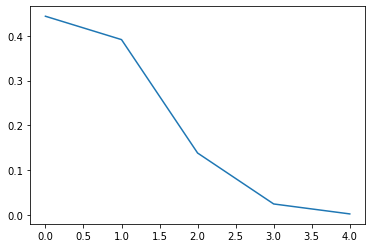

In [16]:
# run this code
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Step 3: Explain what you observe from the plot above.

`Answer:`

    The plot shows the probability mass function for a discrete random variable.
    We see there are only lines at whole numbers (discrete) and that the probability values sum to 1.

    The plot also shows that the probability that a given number of people clicks an add decreases as the number of people  that has to click increases. 

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

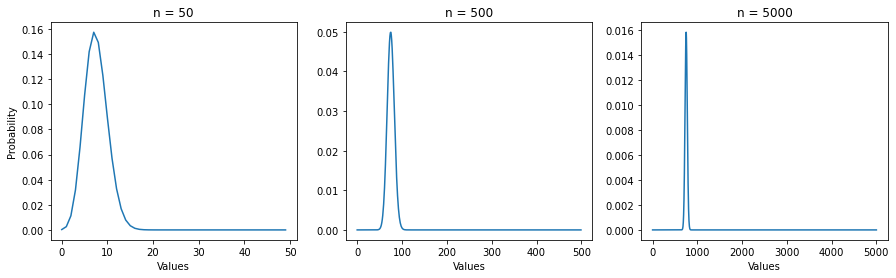

In [18]:
# your code here
# Create figure and axes
f, ax = plt.subplots(1,3)
f.set_figwidth(15)

# Variables
sample_size = [50, 500, 5000]
p = 0.15

# Plot each PMF
# For visualization reasons, the next discrete distributions are represented using continuous lines
for i in range(3):
    x = range(sample_size[i])
    dist = stats.binom(sample_size[i], p)
    ax[i].set_title('n = ' + str(sample_size[i]))
    ax[i].plot(x, dist.pmf(x))
    ax[i].set_xlabel('Values')
ax[0].set_ylabel('Probability')
plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

`Answer:`

    As the sample size increases, we see that the distribution changes.
    This is because the shape of the binomial distribution depends on the size of the group of people that clicked or not the YouTube ad.  

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Answer:`
    
    The Poisson distribution is a discrete distribution function expressing probability 
    of a given number of events occurring  over a fixed interval of time or space.

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [20]:
# your code here
mu = 300
visits = 320

# Probability
stats.poisson.pmf(visits, mu)

0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [21]:
# your code here
# Variables
visits = 60

# Probability
stats.poisson.pmf(visits, mu)

2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [26]:
# your code here
arr = stats.poisson.pmf(range(1000), mu)


#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

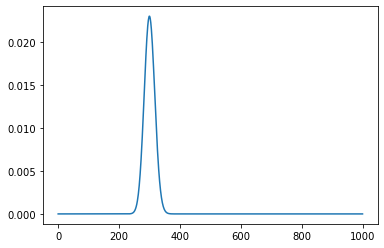

In [27]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [28]:
# your code here
mu = 35;
stdev = 8;
n_samples = 200;
sigma = stdev / np.sqrt(n_samples)

# Probability
p_3035 = stats.norm.cdf(35, mu, sigma) - stats.norm.cdf(30, mu, sigma)
p_3035

0.5

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [29]:
# your code here
time = 115 * 60
time_x_package = time / n_samples

# Probability
1  - stats.norm.cdf(time_x_package, mu, sigma)

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [30]:
# your code here
# Variables
mu = 200
sigma = 40

# Probability
1 - stats.norm.cdf(300,mu,sigma)

0.006209665325776159

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [31]:
# your code here
stats.norm.cdf(240,mu,sigma) - stats.norm.cdf(160,mu,sigma)

0.6826894921370859

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [32]:
# your code here
stats.norm.cdf(150, mu, sigma)

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [34]:
# your code here
1 - stats.norm.cdf(3000, mu,sigma)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [35]:
# your code here
mu = 4

# Probability
stats.poisson.cdf(0,mu)

0.018315638888734182

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [36]:
# your code here
stats.poisson.cdf(1,mu)

0.0915781944436709

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [37]:
# your code here
stats.poisson.cdf(6,mu) - stats.poisson.cdf(2,4)

0.6512227160438819

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [38]:
# your code here
1 - stats.poisson.cdf(2,mu/2)

0.3233235838169366